In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import accuracy

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [4]:
model.compile(optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
                loss=nn.CrossEntropyLoss(),
                metrics={'acc': accuracy},
                )

In [5]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [6]:
def f(trainer):
    print(trainer.epoch)

history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            callbacks=k4t.callbacks.LambdaCallback(on_epoch_begin=f)
            )

Train on 120 samples, validate on 30 samples:
1
Epoch 1/15 - 0.0s - loss: 1.2522 - acc: 0.3281 - val_loss: 1.1271 - val_acc: 0.3667 - lr: 3e-04
2
Epoch 2/15 - 0.0s - loss: 1.1242 - acc: 0.5156 - val_loss: 1.0564 - val_acc: 0.7000 - lr: 3e-04
3
Epoch 3/15 - 0.0s - loss: 1.0589 - acc: 0.6484 - val_loss: 1.0184 - val_acc: 0.6000 - lr: 3e-04
4
Epoch 4/15 - 0.0s - loss: 1.0137 - acc: 0.4271 - val_loss: 0.9948 - val_acc: 0.3667 - lr: 3e-04
5
Epoch 5/15 - 0.0s - loss: 0.9928 - acc: 0.2266 - val_loss: 0.9752 - val_acc: 0.3333 - lr: 3e-04
6
Epoch 6/15 - 0.0s - loss: 0.9683 - acc: 0.3464 - val_loss: 0.9560 - val_acc: 0.4000 - lr: 3e-04
7
Epoch 7/15 - 0.0s - loss: 0.9517 - acc: 0.3750 - val_loss: 0.9364 - val_acc: 0.4000 - lr: 3e-04
8
Epoch 8/15 - 0.0s - loss: 0.9331 - acc: 0.4714 - val_loss: 0.9150 - val_acc: 0.5667 - lr: 3e-04
9
Epoch 9/15 - 0.0s - loss: 0.9110 - acc: 0.6328 - val_loss: 0.8917 - val_acc: 0.6667 - lr: 3e-04
10
Epoch 10/15 - 0.0s - loss: 0.8926 - acc: 0.6641 - val_loss: 0.8690 - 

<AxesSubplot:>

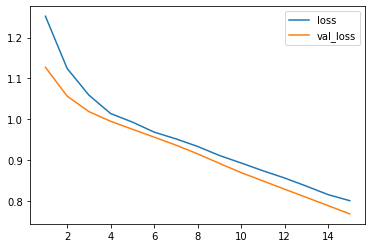

In [7]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [8]:
model.evaluate(X, y)

OrderedDict([('loss', 0.7829431), ('acc', 0.6875)])

In [9]:
model.predict(X)

array([[ 0.510429  , -0.55121994, -0.26510713],
       [ 0.38527328, -0.42981267, -0.18872021],
       [ 0.4558186 , -0.4958642 , -0.2425621 ],
       [ 0.37700015, -0.4221902 , -0.2004757 ],
       [ 0.53155786, -0.57095087, -0.28442317],
       [ 0.5234496 , -0.56865436, -0.26605338],
       [ 0.47029573, -0.5107683 , -0.2581857 ],
       [ 0.45788378, -0.5015447 , -0.23738164],
       [ 0.3507296 , -0.3948361 , -0.18810746],
       [ 0.38879365, -0.4346403 , -0.19722047],
       [ 0.5387674 , -0.5808991 , -0.27428743],
       [ 0.42747474, -0.47289586, -0.22939658],
       [ 0.388795  , -0.43296266, -0.19821678],
       [ 0.45535845, -0.4888398 , -0.25244677],
       [ 0.67578137, -0.69326717, -0.34774053],
       [ 0.6830103 , -0.7093674 , -0.36453894],
       [ 0.6132542 , -0.6410565 , -0.32220662],
       [ 0.50432235, -0.5445664 , -0.2589771 ],
       [ 0.51103896, -0.557753  , -0.24624562],
       [ 0.5501612 , -0.59085155, -0.2939503 ],
       [ 0.41360903, -0.4628473 , -0.195